# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [192]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [193]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [194]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [195]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42, max_depth=None)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [196]:
# Acá realizá la predicción
y_pred=model.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [197]:
# En esta celda calculá el rmse
import numpy as np
from sklearn.metrics import mean_squared_error

mse_tree = mean_squared_error(y_test, y_pred)
print("RMSE del árbol de decisión: ", np.sqrt(mse_tree))

RMSE del árbol de decisión:  25192.157852375523


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [198]:
rmses_train=[]
rmses_test=[]
profundidad=range(1,30,5)
for i in profundidad:
    
    model=DecisionTreeRegressor(random_state=42, max_depth=i)
    model.fit(X_train,y_train)
    
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
        
    mse_train=mean_squared_error(y_train, y_pred_train)
    mse_test=mean_squared_error(y_test, y_pred_test)
        
    rmses_train.append(np.sqrt(mse_train))
    rmses_test.append(np.sqrt(mse_test))
    
rmses_train=np.array(rmses_train)
rmses_test=np.array(rmses_test)
    
print('RMSE en train es: {}'.format(rmses_train))
print('RMSE en test es: {}'.format(rmses_test))

RMSE en train es: [26884.06654887 20287.87436315 14100.97157988  6386.51360971
  1936.41943829   569.23696121]
RMSE en test es: [26295.14025353 21908.87282097 22070.66990221 24532.30568578
 25595.49716895 25049.78309752]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

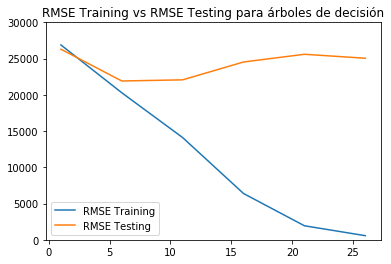

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [200]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

y_pred=knr.predict(X_test)

mse_knr = mean_squared_error(y_test, y_pred)
print("RMSE de K-vecinos: ", np.sqrt(mse_knr))

RMSE de K-vecinos:  24378.43157503682


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [201]:
# Calculá los cambio en el rmse en esta celda
rmses_train=[]
rmses_test=[]
vecinos=range(1,30,1)
for k in vecinos:
    
    knr=KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    
    y_pred_train=knr.predict(X_train)
    y_pred_test=knr.predict(X_test)
        
    mse_train=mean_squared_error(y_train, y_pred_train)
    mse_test=mean_squared_error(y_test, y_pred_test)
        
    rmses_train.append(np.sqrt(mse_train))
    rmses_test.append(np.sqrt(mse_test))
    
rmses_train=np.array(rmses_train)
rmses_test=np.array(rmses_test)

print('RMSE en train es: {}'.format(rmses_train))
print('RMSE en test es: {}'.format(rmses_test))

RMSE en train es: [  717.70831601 13746.00901631 16557.17826058 17829.29276124
 18751.37922946 19293.81480668 19794.7172632  20139.78742145
 20468.65631713 20701.78682244 20912.32302589 21139.14308596
 21272.33279882 21364.85500146 21441.8552755  21573.81242697
 21670.19453092 21772.4951519  21860.1886812  21967.90613045
 22062.75264161 22142.01003813 22232.70420532 22302.81530619
 22392.32781797 22470.93758855 22526.67866161 22566.54520745
 22623.42465921]
RMSE en test es: [26314.37504703 24378.43157504 23324.77604895 23028.27454989
 22733.04036884 22731.27025782 22620.31310691 22634.68948273
 22608.86349886 22568.21199679 22479.91578952 22442.04603012
 22457.04684082 22566.69695854 22566.46518733 22525.32871707
 22483.1950422  22497.9202993  22527.94881574 22537.14265332
 22518.04362319 22500.3390074  22502.87960961 22512.65867569
 22563.79354977 22650.7757449  22659.51202036 22704.29880466
 22730.28949109]


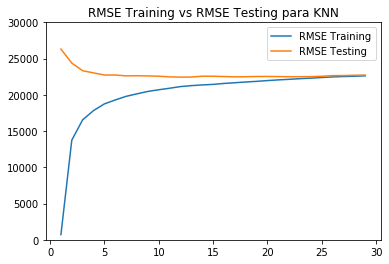

In [202]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [203]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [204]:
regressor=DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [207]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

print('RMSE train:', nmsq2rmse(score))
print('RMSE train Promedio:', nmsq2rmse(score).mean())
print('RMSE train Desvío Estándar:', nmsq2rmse(score).std())

RMSE train: [24037.90740934 19703.46532466 22659.32140923 27605.17890655
 21088.81758443 23055.77357908 24410.00252197 26107.04701041
 24751.45257879 22349.51273982]
RMSE train Promedio: 23576.847906427334
RMSE train Desvío Estándar: 2207.462099653071


In [208]:
score_test=cross_val_score(regressor, X_test, y_test, scoring='neg_mean_squared_error', cv=10)

print('RMSE test:', nmsq2rmse(score))
print('RMSE test Promedio:', nmsq2rmse(score).mean())
print('RMSE test Desvío Estándar:', nmsq2rmse(score).std())

RMSE test: [24037.90740934 19703.46532466 22659.32140923 27605.17890655
 21088.81758443 23055.77357908 24410.00252197 26107.04701041
 24751.45257879 22349.51273982]
RMSE test Promedio: 23576.847906427334
RMSE test Desvío Estándar: 2207.462099653071


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [209]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [210]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [211]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,108426.872,28426.872
1,128000.000,151372.531,23372.531
2,150000.000,151372.531,1372.531
3,85000.000,99219.122,14219.122
4,135000.000,130337.039,4662.961
5,135000.000,119967.914,15032.086
6,68000.000,87243.666,19243.666
7,110000.000,128379.238,18379.238
8,134000.000,154167.172,20167.172
9,110000.000,85248.777,24751.223
